<a href="https://colab.research.google.com/github/Aaron-David-HdM/Applied-Data-Analytics/blob/main/UseCase_4/Durchfuehrung%20der%20Regressionsanalyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Git-Repository klonen sowie pullen**

In [2]:
!git clone https://github.com/Aaron-David-HdM/Applied-Data-Analytics.git

fatal: destination path 'Applied-Data-Analytics' already exists and is not an empty directory.


**Zu dem UseCase_4-Pfad wechseln**

In [3]:
%cd /content/Applied-Data-Analytics/UseCase_4

/content/Applied-Data-Analytics/UseCase_4


**Importieren von benötigten Bibliotheken sowie Lesen der CSV-Datei**

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 
import seaborn as sns  

filepath = 'Einkommen_und_Verkaeufe_UseCase_4.csv' # Bereinigte Daten für Usecase 4
df = pd.read_csv(filepath, decimal='.')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Ausgabe des Dataframes**

In [5]:
df

,Unnamed: 0,YearlyIncome,Male,Age,YearlyPurchases
0,0,26016,0,29,44
1,1,8964,0,26,46
2,2,91620,0,26,7
3,3,15936,0,23,5
4,4,102768,0,27,20
...,...,...,...,...,...
995,995,4932,0,31,18
996,996,1956,0,28,18
997,997,29712,1,26,32
998,998,12012,0,29,34


**Anpassen der Daten um Abhängigkeiten in den Daten zu erzeugen**

In [6]:
df.loc[df['YearlyPurchases'] < 13, 'YearlyIncome'] *= 2
df.loc[(df['YearlyPurchases'] < 24) & (df['YearlyPurchases'] > 12), 'YearlyIncome'] *= 3
df.loc[(df['YearlyPurchases'] < 35) & (df['YearlyPurchases'] > 23), 'YearlyIncome'] *= 4
df.loc[df['YearlyPurchases'] > 34, 'YearlyIncome'] *= 5

df.loc[df['YearlyPurchases'] < 13, 'Age'] += 2 
df.loc[(df['YearlyPurchases'] < 24) & (df['YearlyPurchases'] > 12), 'Age'] += 3 
df.loc[(df['YearlyPurchases'] < 35) & (df['YearlyPurchases'] > 23), 'Age'] += 4 
df.loc[df['YearlyPurchases'] > 34, 'Age'] += 5 

df.loc[df['Age'] >= 34, 'Age'] = 34
df[['YearlyIncome']] = df[['YearlyIncome']].apply(np.int64)

**Ausgabe des Dataframes**

In [7]:
df

,Unnamed: 0,YearlyIncome,Male,Age,YearlyPurchases
0,0,130080,0,34,44
1,1,44820,0,31,46
2,2,183240,0,28,7
3,3,31872,0,25,5
4,4,308304,0,30,20
...,...,...,...,...,...
995,995,14796,0,34,18
996,996,5868,0,31,18
997,997,118848,1,30,32
998,998,48048,0,33,34


**Nicht benötigte 'Unnamed'-Spalte entfernt**

In [8]:
df.drop(columns= ['Unnamed: 0'], inplace = True)

**Erstellen einer Korrelationsmatrix, um mögliche Zusammenhänge zwischen dem Label und den Features aufzuzeigen**

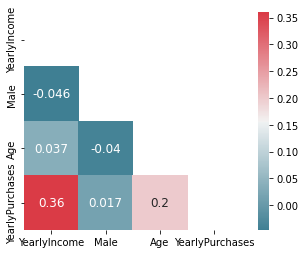

In [9]:
corr = df.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,  square=True, annot_kws={"size": 12});

**Erstellen eines Scatterplots mit Einkommen(x) und Käufen(y)**

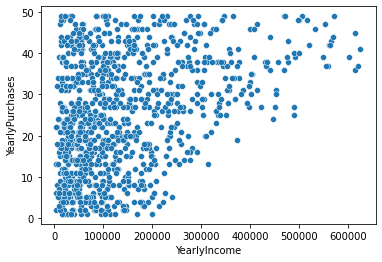

In [10]:
sns.scatterplot(data=df, x="YearlyIncome", y="YearlyPurchases")

**Erstellen eines lm-Plots mit Einkommen(x) und Käufen(y)**

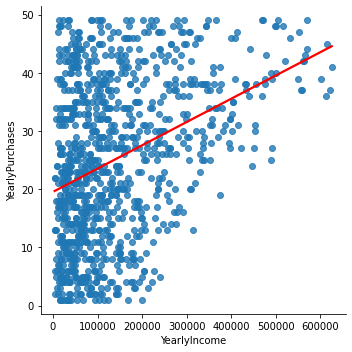

In [11]:
sns.lmplot(x='YearlyIncome', y='YearlyPurchases', data=df, line_kws={'color':'red'}, height=5, ci=None);

**Datensatz in Abhängigkeit vom Purchased-Feature untersucht**

In [12]:
df.groupby(["YearlyPurchases"]).describe().T

YearlyPurchases                1              2   ...             48             49
YearlyIncome count      17.000000      18.000000  ...      16.000000      22.000000
             mean    68743.058824   76278.666667  ...  229800.000000  222051.818182
             std     56364.744575   43867.349584  ...  175700.008423  170216.141550
             min     15192.000000    4464.000000  ...   14100.000000   13440.000000
             25%     28632.000000   42384.000000  ...   87630.000000   90420.000000
             50%     39744.000000   82104.000000  ...  220590.000000  188670.000000
             75%    103368.000000  103116.000000  ...  342780.000000  334260.000000
             max    199896.000000  146520.000000  ...  516300.000000  571080.000000
Male         count      17.000000      18.000000  ...      16.000000      22.000000
             mean        0.529412       0.444444  ...       0.500000       0.454545
             std         0.514496       0.511310  ...       0.516398       0.509647
             min         0.000000       0.000000  ...       0.000000       0.000000
             25%         0.000000       0.000000  ...       0.000000       0.000000
             50%         1.000000       0.000000  ...       0.500000       0.000000
             75%         1.000000       1.000000  ...       1.000000       1.000000
             max         1.000000       1.000000  ...       1.000000       1.000000
Age          count      17.000000      18.000000  ...      16.000000      22.000000
             mean       26.882353      26.944444  ...      30.062500      31.000000
             std         4.284891       4.916625  ...       4.373690       3.394674
             min        20.000000      20.000000  ...      23.000000      24.000000
             25%        24.000000      23.000000  ...      26.750000      28.250000
             50%        26.000000      26.500000  ...      32.000000      32.500000
             75%        30.000000      29.750000  ...      34.000000      34.000000
             max        34.000000      34.000000  ...      34.000000      34.000000

[24 rows x 49 columns]

**Pairplot zu allen relevanten Variablen erstellt**

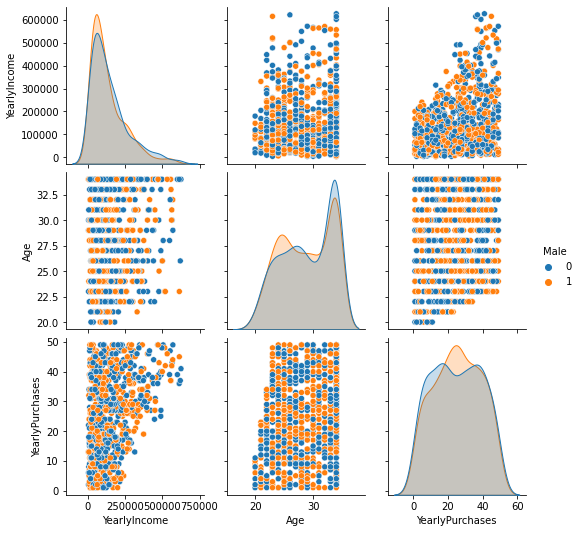

In [13]:
sns.pairplot(data=df, hue="Male");

**Jointplot mit Einkommen(x) und Käufen(y) erstellt**

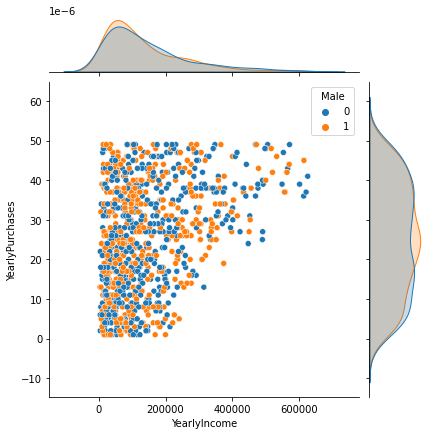

In [14]:
sns.jointplot(x="YearlyIncome", y="YearlyPurchases", hue="Male", data=df);

**Dreidimensionales Scatterplot mit Einkommen(x), Käufen(y) und dem Alter(z) erstellt**

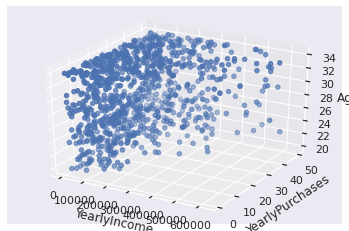

In [15]:
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['YearlyIncome']
y = df['YearlyPurchases']
z = df['Age']

ax.set_xlabel("YearlyIncome")
ax.set_ylabel("YearlyPurchases")
ax.set_zlabel("Age")

ax.scatter(x, y, z) #, hue = "Male"

plt.show()

**Ausgeben der durchschnittlichen Anzahl an Käufen**

In [16]:
df["YearlyPurchases"].mean()

25.145

**Anlegen des Y-Labels**

In [17]:
y = df['YearlyPurchases']

**Anlegen eines Dummy-Datensatzes**

In [18]:
dummies = df['Male']

**Ausgabe des Dummy-Datensatzes**

In [19]:
dummies

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    1
998    0
999    0
Name: Male, Length: 1000, dtype: int64

**Entfernen der Outcome-Variable 'YearlyPurchases' und der Dummy-Variable 'Male'**

In [20]:
X_numerical = df.drop(['YearlyPurchases', 'Male'], axis=1)

**Anlegen einer Liste mit allen numerischen Features mit Ausnahme der Dummy-Variable**

In [21]:
list_numerical = X_numerical.columns
list_numerical

Index(['YearlyIncome', 'Age'], dtype='object')

**Erneutes Kontrollieren der Daten auf Null-Werte und deren Datentypen sowie Zusammenführen der Numerischen Daten und der Dummie-Daten**

Anmerkung: Letztendlich haben wir uns dazu entschieden, die Dummy-Variable nicht mit in die Datensätze aufzunehmen, da dieses Feature laut Korrelations-Matrix keinen Zusammenhang zu unserem Label aufweist.

In [22]:
X = pd.DataFrame(X_numerical)

#X = pd.concat([X_numerical, dummies], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   YearlyIncome  1000 non-null   int64
 1   Age           1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


**Aufteilen der Daten auf den Trainings- und den Testdatensatz (70/30 Verhältnis)**

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

**Ausgabe des Trainingsdatensatzes**

In [24]:
X_train.head()

,YearlyIncome,Age
742,84624,29
676,386064,34
571,281988,28
99,51120,34
78,302016,22


**Standardisierung der numerischen Daten mit Außnahme der Dummy-Daten ('Male') um Data Leakage zu verhindern** 

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[list_numerical]) 

X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

**Ausgabe des standardisierten Trainingsdatensatzes**

In [26]:
X_train

,YearlyIncome,Age
742,-0.470103,0.023870
676,2.012095,1.168310
571,1.155084,-0.205018
99,-0.745990,1.168310
78,1.320004,-1.578347
...,...,...
320,-0.862195,-0.205018
527,-0.128208,-0.662795
996,-1.118616,0.481646
125,-0.938084,-0.891683


**Anwenden der Lasso Regression mit einem willkürlichen Alpha-Wert von 1**

In [27]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

Lasso(alpha=1)

**Ausgabe des R²-Scores für den Trainings- und Testdatensatz**

In [28]:
print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

R squared training set 16.56
R squared test set 13.86


**Ausgabe der mittleren quadratischen Abweichung (MSE) für beide Datensätze**

In [29]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 152.22
MSE test set 168.43


**Ausgabe der Wurzel der mittleren Fehlerquadratsumme (RMSE)**

In [30]:
rmse = np.sqrt(mean_squared_error(y_test,pred))
print(rmse)

12.978225869866707


**Untersuchen der Alpha-Werte im Zusammenhang mit den Koeffizienten mittels eines Plots**

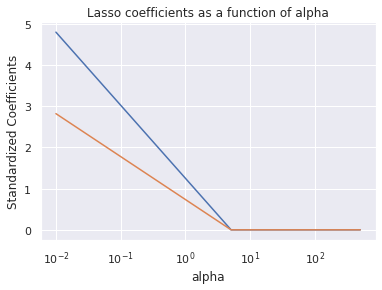

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

**Anwenden der k-fold cross validation, um den optimalen Wert für Alpha zu finden**

In [31]:
from sklearn.linear_model import LassoCV

model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model_ = model.fit(X_train, y_train)

**Ausgabe des optimalen Werts für Alpha**

In [32]:
model.alpha_

0.004913849297115946

**Nutzen des optimalen Alpha Wertes für die Lasso-Regression**

In [33]:
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.004913849297115946)

**Ausgabe des Koeffizienten des jeweiligen Features**

In [34]:
print(list(zip(lasso_best.coef_, X)))

[(4.799640942909449, 'YearlyIncome'), (2.822972356745254, 'Age')]


**Ausgabe des R²-Scores für den Trainings- und Testdatensatz**

In [35]:
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 17.61
R squared test set 13.79


**Ausgabe der mittleren quadratischen Abweichung (MSE) für den Test-Datensatz**

In [39]:
mean_squared_error(y_test, lasso_best.predict(X_test))

168.56280828829395


**Ausgabe der Wurzel der mittleren Fehlerquadratsumme (RMSE) für den Test-Datensatz**

In [41]:
rmse = np.sqrt(mean_squared_error(y_test, lasso_best.predict(X_test)))
print(rmse)

12.983174045213056


**Ausgabe des mittleren absoluten Fehlers (MAE) für den Test-Datensatz**

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

10.953076680942766

**Ausgabe der Ergebnisse der Cross-Validation mittels eines Plots**

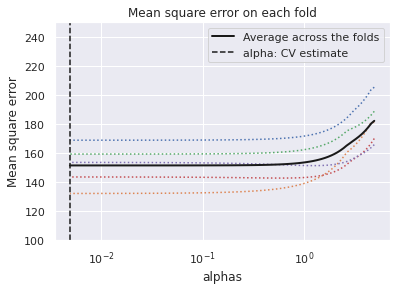

In [ ]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 100, 250
plt.ylim(ymin, ymax);